In [41]:
using DifferentialEquations, DiffEqProblemLibrary, ParameterizedFunctions, Plots, ODE, ODEInterfaceDiffEq

prob = prob_ode_rober 
prob.tspan = (0.0,1e5)
sol = solve(prob,CVODE_BDF(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol.t,sol.u)
abstols = 1./10.^(4:11)
reltols = 1./10.^(1:8)

8-element Array{Float64,1}:
 0.1   
 0.01  
 0.001 
 0.0001
 1.0e-5
 1.0e-6
 1.0e-7
 1.0e-8

## Check the Graphs

Make sure they get the right looking solution.


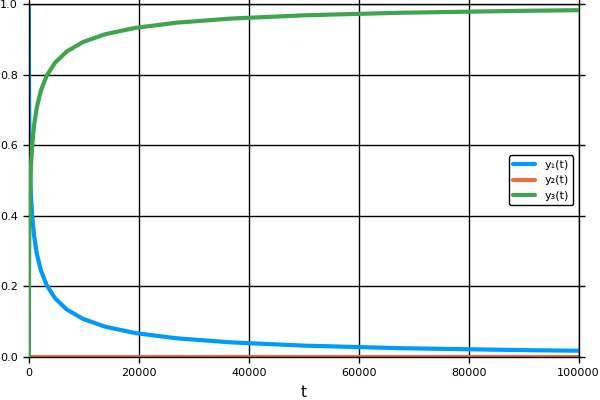

In [31]:
sol = solve(prob,Rosenbrock23(),abstol=abstols[3],reltol=reltols[3],maxiters=Int(1e5))
pyplot()
plot(sol,denseplot=false)


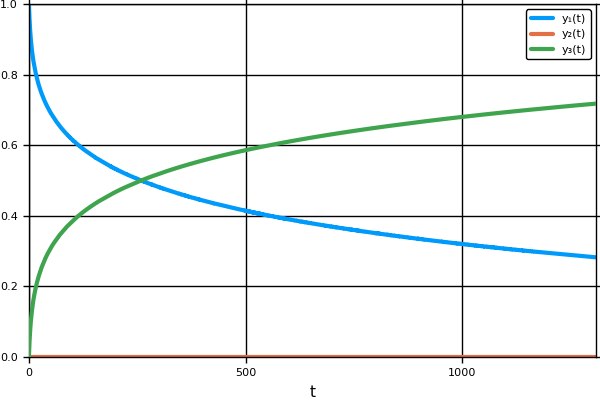

In [19]:
sol = solve(prob,Rosenbrock32())
plot(sol,denseplot=false)


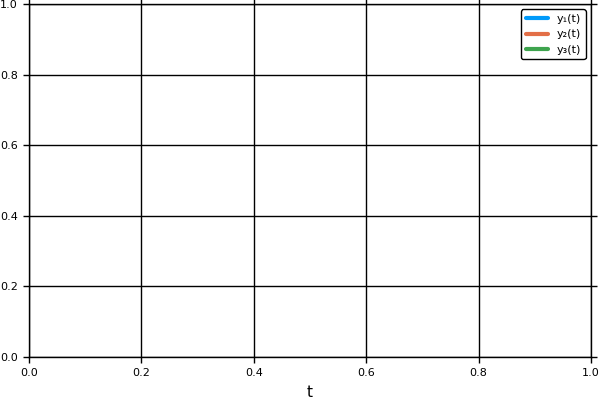

In [20]:
sol = solve(prob,ode23s(),abstol=abstols[3],reltol=reltols[3],maxiters=Int(1e5))
plot(sol,denseplot=false)


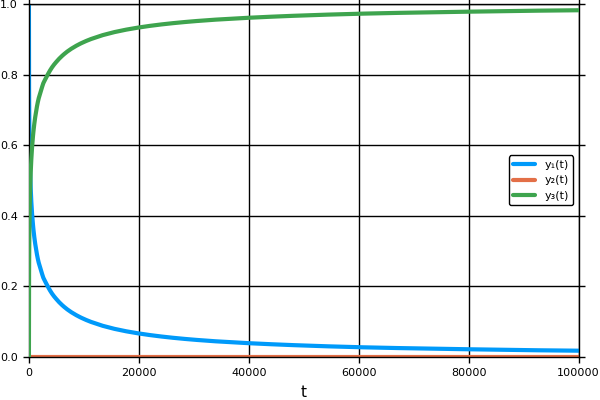

In [21]:
sol = solve(prob,CVODE_BDF(),abstol=abstols[3],reltol=reltols[3],maxiters=Int(1e5))
plot(sol,denseplot=false)


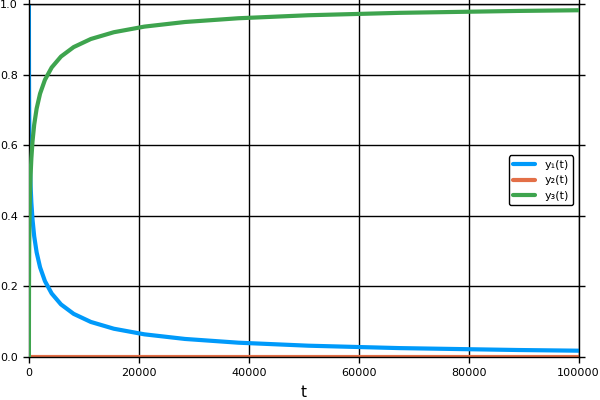

In [22]:
sol = solve(prob,radau(),abstol=abstols[3],reltol=reltols[3],maxiters=Int(1e5))
plot(sol,denseplot=false)


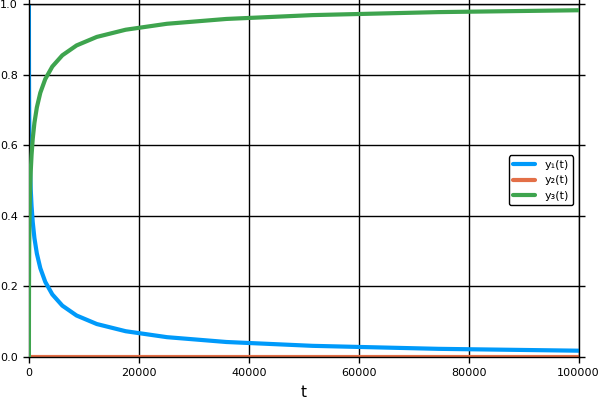

In [23]:
sol = solve(prob,rodas(),abstol=abstols[3],reltol=reltols[3],maxiters=Int(1e5))
plot(sol,denseplot=false)

## High Tolerances

This is the speed when you just want the answer.


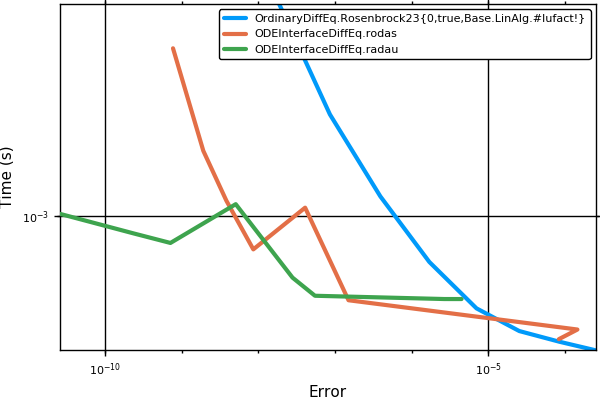

In [42]:
setups = [Dict(:alg=>Rosenbrock23()),
          #Dict(:alg=>ode23s()),
          Dict(:alg=>rodas()),
          Dict(:alg=>radau())]
wp = ode_workprecision_set(prob,abstols,reltols,setups;dense=false,save_timeseries=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

### Note

Note that at high tolerances Sundials' `CVODE_BDF` fails.

In [27]:
abstols = 1./10.^(4:12)
reltols = 1./10.^(1:9)
setups = [Dict(:alg=>CVODE_BDF())]
wp = ode_workprecision_set(prob,abstols,reltols,setups;dense=false,save_timeseries=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)


[CVODES WARNING]  CVode
  Internal t = 28.0572 and h = 1.66679e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.0572 and h = 1.66679e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.0572 and h = 1.66679e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.0572 and h = 7.99621e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.0572 and h = 7.99621e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.0572 and h = 7.99621e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.0572 and h = 3.84087e-16 are such that t + h = t on the next step. The solver will continue a

LoadError: CVode failed with error code = -4

### Low Tolerances

This is the speed at lower tolerances.


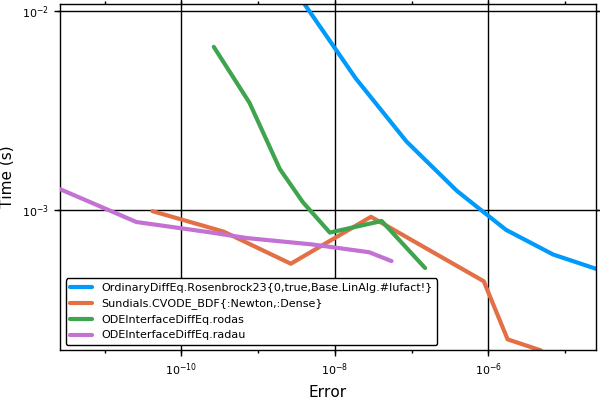

In [43]:
abstols = 1./10.^(6:12)
reltols = 1./10.^(3:9)

setups = [Dict(:alg=>Rosenbrock23()),
          #Dict(:alg=>ode23s()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>rodas()),
          Dict(:alg=>radau())]
wp = ode_workprecision_set(prob,abstols,reltols,setups;dense=false,save_timeseries=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

### Conclusion

Sundials is fast but only safe at low tolerances. Radau is always safe. Rosenbrock23 is good at high tolerances.